In [1]:
import anal as pm

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rc('font', size=10) #controls default text size
plt.rc('axes', titlesize=8) #fontsize of the title
plt.rc('axes', labelsize=10) #fontsize of the x and y labels
plt.rc('xtick', labelsize=8) #fontsize of the x tick labels
plt.rc('ytick', labelsize=8) #fontsize of the y tick labels
plt.rc('legend', fontsize=8) #fontsize of the legend

import locale
locale.setlocale(locale.LC_ALL, 'cs_CZ.utf8')
plt.rcParams['axes.formatter.use_locale'] = True

## Zpracovani

In [2]:
f1 = pm.cofe_room_t()
f2 = pm.cofe_low_t()
f1.df.drop(7, inplace=True)
f1.load()
f1.preprocess()
f1.process()
f2.load()
f2.preprocess()
f2.process()

loading set: 0
loading set: 1
loading set: 2
loading set: 3
loading set: 4
loading set: 5
loading set: 6
loading set: 7
loading set: 8
preprocessing set: 0
preprocessing set: 1
preprocessing set: 2
preprocessing set: 3
preprocessing set: 4
preprocessing set: 5
preprocessing set: 6
preprocessing set: 7
preprocessing set: 8
processing set: 0
processing set: 1
processing set: 2
processing set: 3
processing set: 4
processing set: 5
processing set: 6
processing set: 7
processing set: 8
loading set: 0
loading set: 1
loading set: 2
loading set: 3
loading set: 4
loading set: 5
loading set: 6
loading set: 7
loading set: 8
preprocessing set: 0
preprocessing set: 1
preprocessing set: 2
preprocessing set: 3
preprocessing set: 4
preprocessing set: 5
preprocessing set: 6
preprocessing set: 7
preprocessing set: 8
processing set: 0
processing set: 1
processing set: 2
processing set: 3
processing set: 4
processing set: 5
processing set: 6
processing set: 7
processing set: 8


In [3]:
print('room T')
f1.analyze()
print('low T')
f2.analyze()

room T
analyzing set: 0
analyzing set: 1
analyzing set: 2
analyzing set: 3
analyzing set: 4
analyzing set: 5
analyzing set: 6
analyzing set: 7
analyzing set: 8
postprocessing
low T
analyzing set: 0
analyzing set: 1
analyzing set: 2
analyzing set: 3
analyzing set: 4
analyzing set: 5
analyzing set: 6
analyzing set: 7
analyzing set: 8
postprocessing


## Kreslení

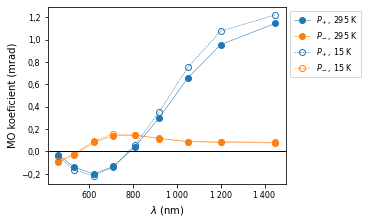

In [15]:
fig, ax = plt.subplots(figsize=(5,3),constrained_layout=True)

lw=0.5

ax.plot(f1.df['wavelength'], f1.df['Pp'], marker='o', color='C0', linewidth=lw, label=r'$P_+$, 295 K')
ax.plot(f1.df['wavelength'], f1.df['Pm'], marker='o', color='C1', linewidth=lw, label=r'$P_-$, 295 K')
ax.plot(f2.df['wavelength'], f2.df['Pp'], marker='o', color='C0', fillstyle='none', linewidth=lw, linestyle='dashed', label=r'$P_+$, 15 K')
ax.plot(f2.df['wavelength'], f2.df['Pm'], marker='o', color='C1', fillstyle='none', linewidth=lw, linestyle='dashed', label=r'$P_-$, 15 K')

ax.axhline(y=0, color='black', linewidth=1)

ax.set_xlabel(r'$\lambda$ (nm)')
ax.set_ylabel(r'MO koeficient (mrad)')

ax.legend(bbox_to_anchor=(1,1))

fig.savefig('out/cofe-pmld.pdf')

D = pd.DataFrame({'lambda':f1.df.reset_index()['wavelength'],
                  'P+ room':f1.df.reset_index()['Pp'],
                  'P- room':f1.df.reset_index()['Pm'],
                  'P+ low':f2.df['Pp'],
                  'P- low':f2.df['Pm']})
D.to_csv('out-nemec/5_04/data.csv')

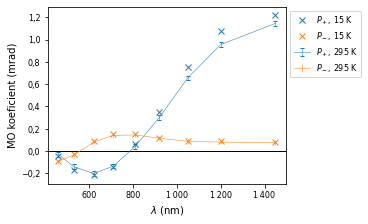

In [5]:
fig, ax = plt.subplots(figsize=(5,3),constrained_layout=True)

ax.errorbar(f1.df['wavelength'], f1.df['Pp'], 0.02, color='C0', linewidth=0.5, capsize=2, label=r'$P_+$, 295 K')
ax.errorbar(f1.df['wavelength'], f1.df['Pm'], 0.02, color='C1', linewidth=0.5, label=r'$P_-$, 295 K')
ax.plot(f2.df['wavelength'], f2.df['Pp'], 'x', color='C0', label=r'$P_+$, 15 K')
ax.plot(f2.df['wavelength'], f2.df['Pm'], 'x', color='C1', label=r'$P_-$, 15 K')

ax.axhline(y=0, color='black', linewidth=1)

ax.set_xlabel(r'$\lambda$ (nm)')
ax.set_ylabel(r'MO koeficient (mrad)')

ax.legend(bbox_to_anchor=(1,1))

## Chyby

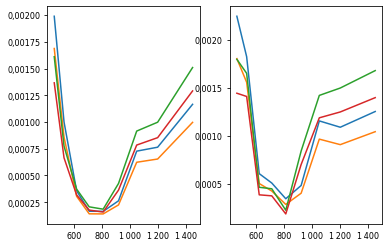

In [6]:
def f(i,j):
    return (f1 if j==1 else f2).df['dPij'].apply(lambda x: x[i])

fig, (ax1, ax2) = plt.subplots(1,2)
for i in range(4):
    ax1.plot(f1.df['wavelength'], f(i,1))
    ax2.plot(f2.df['wavelength'], f(i,2))

In [7]:
f1[5].

SyntaxError: invalid syntax (197955649.py, line 1)

In [ ]:
print("rt+")
print(f1.df['Pip'])
print("rt-")
print(f1.df['Pim'])
print("lt+")
print(f2.df['Pip'])
print("lt-")
print(f2.df['Pim'])

In [ ]:
ax = plt.gca()
ax.plot(f1.df['wavelength'], f1.df['Pp']+f1.df['Pm'])
ax.plot(f1.df['wavelength'], f1.df['Pp']-f1.df['Pm'])

In [11]:
f2.df

,set,obj,wavelength,flags,sample_rotation,hext,k_canon,Pij,dPij,Ppm,Pp,Pm,Pip,Pim
0,0460,<anal.file_import.SetRotmld o...,460,None,0,207,"{'ku': 13.454223267286576, 'phiu': -21.7074372...","[-0.013918999306733236, 0.040575667572776385, ...","[0.0022479926577494316, 0.0018060626624879443,...","[(-0.04527464844247059+0.009308200779463018j),...",-0.046222,-0.085974,-5.808895,1.537127
1,0530,<anal.file_import.SetRotmld o...,530,None,0,207,"{'ku': 11.288183305707827, 'phiu': -17.1692990...","[-0.014690374775108806, -0.14293574640978438, ...","[0.00182643857898471, 0.0015596931840813541, 0...","[(-0.1660585385764015+0.01686008670630159j), (...",-0.166912,-0.023224,-2.898715,-2.680308
2,0620,<anal.file_import.SetRotmld o...,620,None,0,207,"{'ku': 10.649682570850674, 'phiu': -20.0063353...","[-0.04815795108235633, -0.3046413295647873, 0....","[0.0006065256753148719, 0.0005037490375661933,...","[(-0.21731245383458736+0.028918524045887923j),...",-0.219228,0.089423,-3.790007,-6.212180
3,0710,<anal.file_import.SetRotmld o...,710,None,0,207,"{'ku': 11.394691095467971, 'phiu': -17.3910766...","[-0.020318559274972312, -0.2955836237371501, -...","[0.0005085389761408363, 0.0004249570017727391,...",[(-0.14050314036325173+0.0037264058206268724j)...,-0.140553,0.155966,-0.759617,-3.053439
4,0810,<anal.file_import.SetRotmld o...,810,None,0,207,"{'ku': 9.829887558632736, 'phiu': -22.64113414...","[-0.01338023404194222, -0.08815782195401142, -...","[0.00034477010413726646, 0.000285697096733042,...","[(0.0595444955273039-0.00012418743055682586j),...",0.059545,0.148318,-0.059749,-2.612014
5,0920,<anal.file_import.SetRotmld o...,920,None,0,207,"{'ku': 11.699851224360561, 'phiu': -19.0870625...","[5.57717434241118e-05, 0.23877806473078017, -0...","[0.00048301001413126227, 0.0004024054255703148...","[(0.3528031559450091-0.012771124571489531j), (...",0.353034,0.114732,-1.036573,-3.181486
6,1050,<anal.file_import.SetRotmld o...,1050,None,0,207,"{'ku': 10.879304126783879, 'phiu': -20.4838240...","[0.0177157705899321, 0.6663549621649748, -0.83...","[0.0011564312448253046, 0.0009664560055630188,...","[(0.7512140758815615-0.024804735044192623j), (...",0.751623,0.085155,-0.945596,-2.387645
7,1200,<anal.file_import.SetRotmld o...,1200,None,0,207,"{'ku': 9.950725236289951, 'phiu': -19.20077429...","[0.028356557796432244, 0.9878537170223802, -1....","[0.0010904974655651916, 0.0009089546983903666,...","[(1.074825211111786-0.03453981172525674j), (0....",1.075380,0.087191,-0.920291,-2.033306
8,1450,<anal.file_import.SetRotmld o...,1450,None,0,207,"{'ku': 11.431803783844124, 'phiu': -18.7760273...","[0.03483287727798044, 1.1412006642864103, -1.3...","[0.0012544679861889593, 0.0010440101873915007,...","[(1.2206956652766068-0.0392979470538692j), (0....",1.221328,0.079620,-0.921945,-1.607404
